# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [9]:
standard.head(2)

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구


In [12]:
l1 = [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250]
l2 = ['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']

In [157]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
bus = pd.read_csv('./df_seoul_bus_station.csv',index_col=0)
mov = pd.read_csv('./df_seoul_moving.csv',index_col=0)
bis = pd.read_csv('./df_seoul_business.csv',index_col=0)
peo = pd.read_csv('./df_seoul_people.csv',index_col=0)
mov['도착 시군구 코드']

0     11010
1     11020
2     11030
3     11040
4     11050
5     11060
6     11070
7     11080
8     11090
9     11100
10    11110
11    11120
12    11130
13    11140
14    11150
15    11160
16    11170
17    11180
18    11190
19    11200
20    11210
21    11220
22    11230
23    11240
24    11250
Name: 도착 시군구 코드, dtype: int64

In [158]:
for i, v in enumerate(mov['도착 시군구 코드']):
    mov['도착 시군구 코드'][i] = l2[i]
mov['도착 시군구 코드']
mov.rename(columns={'도착 시군구 코드':'자치구'},inplace=True)
mov.to_csv('./df_seoul_moving_.csv')

c:\Users\User\anaconda3\envs\jpytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
mov.rename(columns={'도착 시군구 코드':'자치구'},inplace=True)
mov.head(2)

,자치구,이동 시간 총합(분),이동인구총합,평균 이동 시간(분),이동인구(평균)
0,종로구,10239340,19809988.63,21.443330,41.486279
1,중구,10285410,20275545.43,21.166269,41.724896


In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
display('bus',bus.head(2))
display('mov',mov.head(2))
display('bis',bis.head(2))
display('peo',peo.head(2))

'bus'

,자치구,버스정류장ARS번호,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065


'mov'

,자치구,이동 시간 총합(분),이동인구총합,평균 이동 시간(분),이동인구(평균)
0,종로구,10239340,19809988.63,21.443330,41.486279
1,중구,10285410,20275545.43,21.166269,41.724896


'bis'

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220
1,종로구,삼청동,5,5,42,145,4,4,9,10,...,66,243,2,3,3,8,-,-,7,33


'peo'

,기간,자치구,세대,인구합계,남자합계,여자합계,한국인계,한국인남자,한국인여자,등록외국인계,등록외국인남자,등록외국인여자,세대당인구,65세이상고령자
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


In [36]:
t1 = pd.merge(bus,mov,how='inner',on='자치구')

In [37]:
t2 = pd.merge(t1,peo,how='inner',on='자치구')

In [35]:
t2.head(1)

,자치구,버스정류장ARS번호,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,이동 시간 총합(분),이동인구총합,평균 이동 시간(분),...,남자합계,여자합계,한국인계,한국인남자,한국인여자,등록외국인계,등록외국인남자,등록외국인여자,세대당인구,65세이상고령자
0,강남구,499,91,8030483,7569213,128.767927,121.371512,12904380,46152613.4,23.284573,...,257096,280242,532577,254866,277711,4761,2230,2531,2.27,79575


In [24]:
t2.columns

Index(['자치구', '버스정류장ARS번호', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수',
       '이동 시간 총합(분)', '이동인구총합', '평균 이동 시간(분)', '이동인구(평균)', '기간', '세대', '인구합계',
       '남자합계', '여자합계', '한국인계', '한국인남자', '한국인여자', '등록외국인계', '등록외국인남자',
       '등록외국인여자', '세대당인구', '65세이상고령자'],
      dtype='object')

In [38]:
new = t2.drop(['세대','인구합계','남자합계','여자합계','한국인계','한국인남자','한국인여자','등록외국인계','등록외국인남자','등록외국인여자','세대당인구'],axis=1)
new.shape

(25, 13)

In [39]:
new.head()

,자치구,버스정류장ARS번호,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,이동 시간 총합(분),이동인구총합,평균 이동 시간(분),이동인구(평균),기간,65세이상고령자
0,강남구,499,91,8030483,7569213,128.767927,121.371512,12904380,46152613.40,23.284573,83.277451,2022.1/4,79575
1,강동구,369,21,2890053,2830506,99.161194,97.118065,9596980,21996357.39,26.108477,59.840844,2022.1/4,75477
2,강북구,413,67,4825181,4671783,133.020373,128.791504,8765160,13079023.71,24.282441,36.233295,2022.1/4,64961
3,강서구,566,49,4681083,4652828,88.119480,87.587591,10718780,22770901.22,25.496986,54.165619,2022.1/4,93924
4,관악구,466,86,7655819,7792476,154.753674,157.516040,10091730,19700285.30,23.842468,46.543400,2022.1/4,80686


In [41]:
new.drop(['기간'],axis=1,inplace=True)
new.head(3)

,자치구,버스정류장ARS번호,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,이동 시간 총합(분),이동인구총합,평균 이동 시간(분),이동인구(평균),65세이상고령자
0,강남구,499,91,8030483,7569213,128.767927,121.371512,12904380,46152613.40,23.284573,83.277451,79575
1,강동구,369,21,2890053,2830506,99.161194,97.118065,9596980,21996357.39,26.108477,59.840844,75477
2,강북구,413,67,4825181,4671783,133.020373,128.791504,8765160,13079023.71,24.282441,36.233295,64961


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다

? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다

? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

##### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 - 구별 인구가 많을 경우 많은 사람들이 이용할것이다(송파>강서>노원>은평.. 이었음) & (강남 송파 이동인구가 제일 많았음)

* 가설 2 - 노선 수가 많으면 많은 사람들이 움직인다 (+지리적으로 중앙에 위치한 구역은 대체로 노선 수가 많았음)

* 가설 3 - 기타 주점업이 많은 곳은 야간 버스 운행 수요가 많을 것이다. 그 중에서도 커피 전문점이 적고 이동인구가 높을 경우 비교적 높을 듯

- 가설 4 - 

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')
import scipy.stats as spst

In [33]:
new.columns

Index(['자치구', '버스정류장ARS번호', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수',
       '이동 시간 총합(분)', '이동인구총합', '평균 이동 시간(분)', '이동인구(평균)', '65세이상고령자'],
      dtype='object')

In [43]:
data= new.rename(columns={'자치구':'district','버스정류장ARS번호':'ARS','노선수':'n_route','승차총승객수':'on'
                    ,'하차총승객수':'off','승차평균승객수':'on_mean','하차평균승객수':'off_mean',
                    '이동 시간 총합(분)':'mov_time(m)','이동인구총합':'mov_pop','평균 이동 시간(분)':'mov_time_mean(m)',
                    '이동인구(평균)':'mov_pop_mean','65세이상고령자':'old'})

In [87]:
new = new.rename(columns={'버스정류장ARS번호':'정류장 수'})
new.head(1)

,자치구,정류장 수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,이동 시간 총합(분),이동인구총합,평균 이동 시간(분),이동인구(평균),65세이상고령자
0,강남구,499,91,8030483,7569213,128.767927,121.371512,12904380,46152613.4,23.284573,83.277451,79575


In [44]:
data.head(2)

,district,ARS,n_route,on,off,on_mean,off_mean,mov_time(m),mov_pop,mov_time_mean(m),mov_pop_mean,old
0,강남구,499,91,8030483,7569213,128.767927,121.371512,12904380,46152613.40,23.284573,83.277451,79575
1,강동구,369,21,2890053,2830506,99.161194,97.118065,9596980,21996357.39,26.108477,59.840844,75477


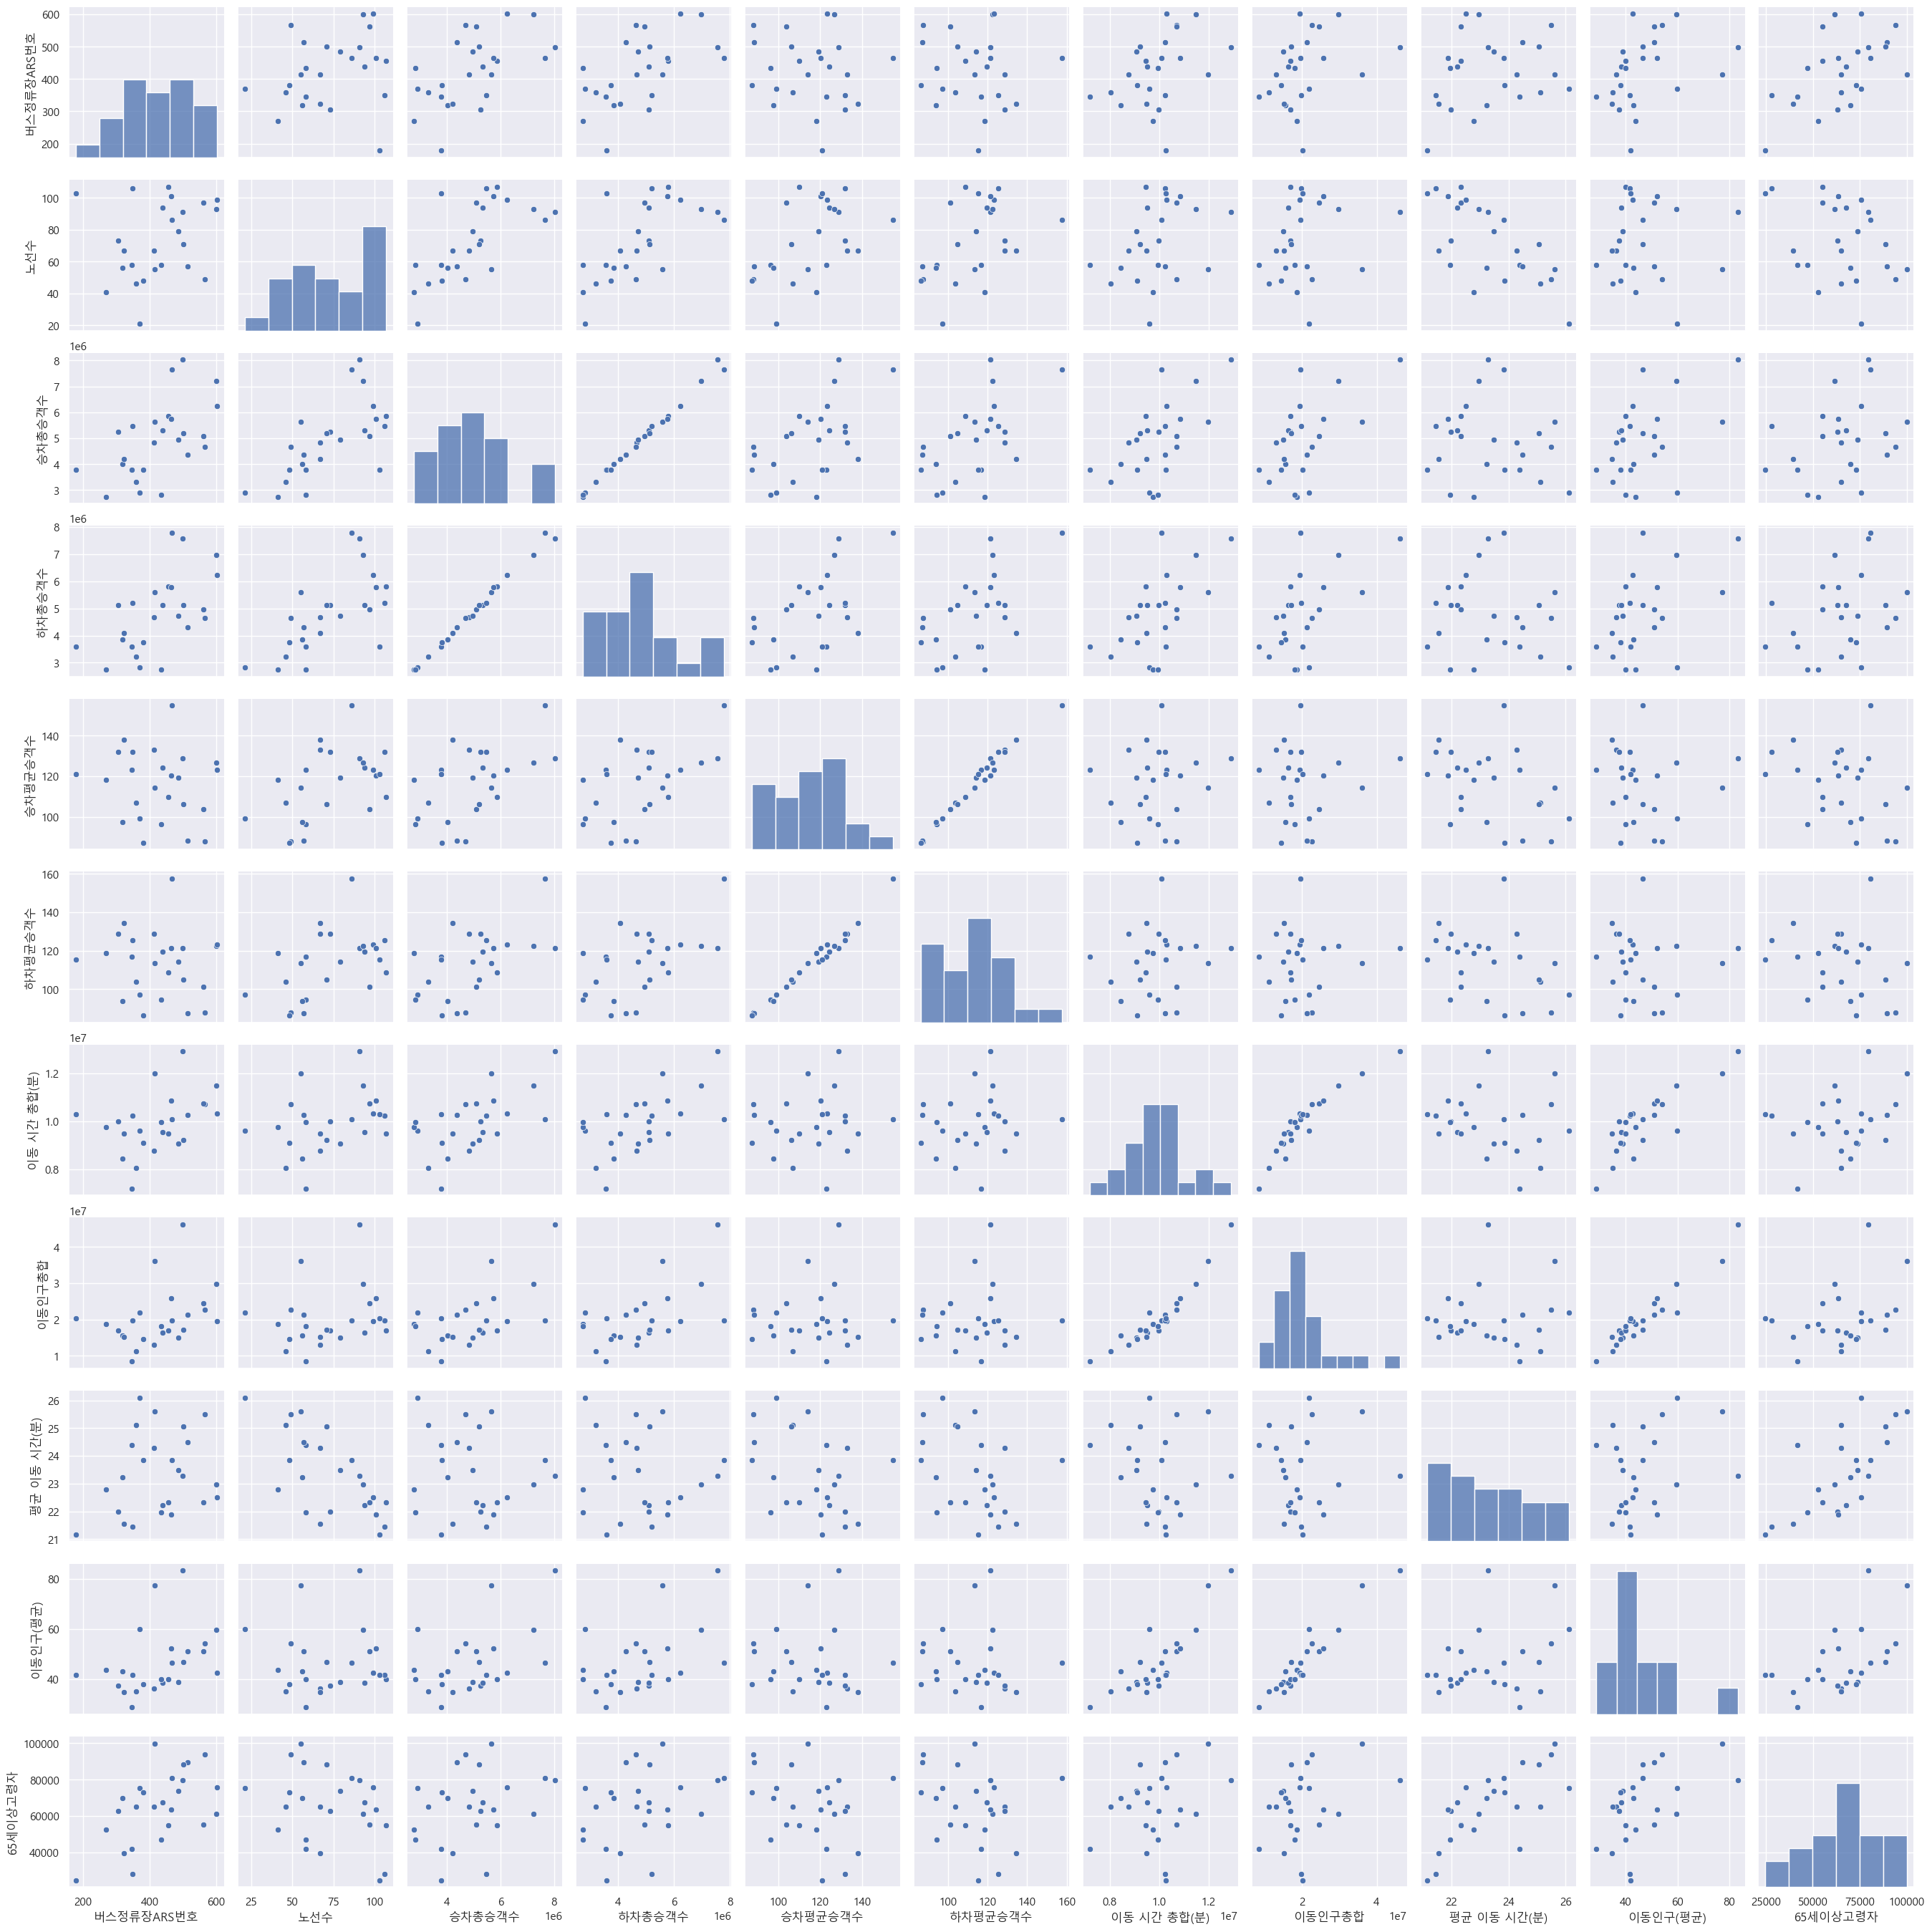

In [74]:
sns.pairplot(new)
plt.savefig('./rr_pairplot.png')

In [48]:
new.columns

Index(['자치구', '버스정류장ARS번호', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수',
       '이동 시간 총합(분)', '이동인구총합', '평균 이동 시간(분)', '이동인구(평균)', '65세이상고령자'],
      dtype='object')

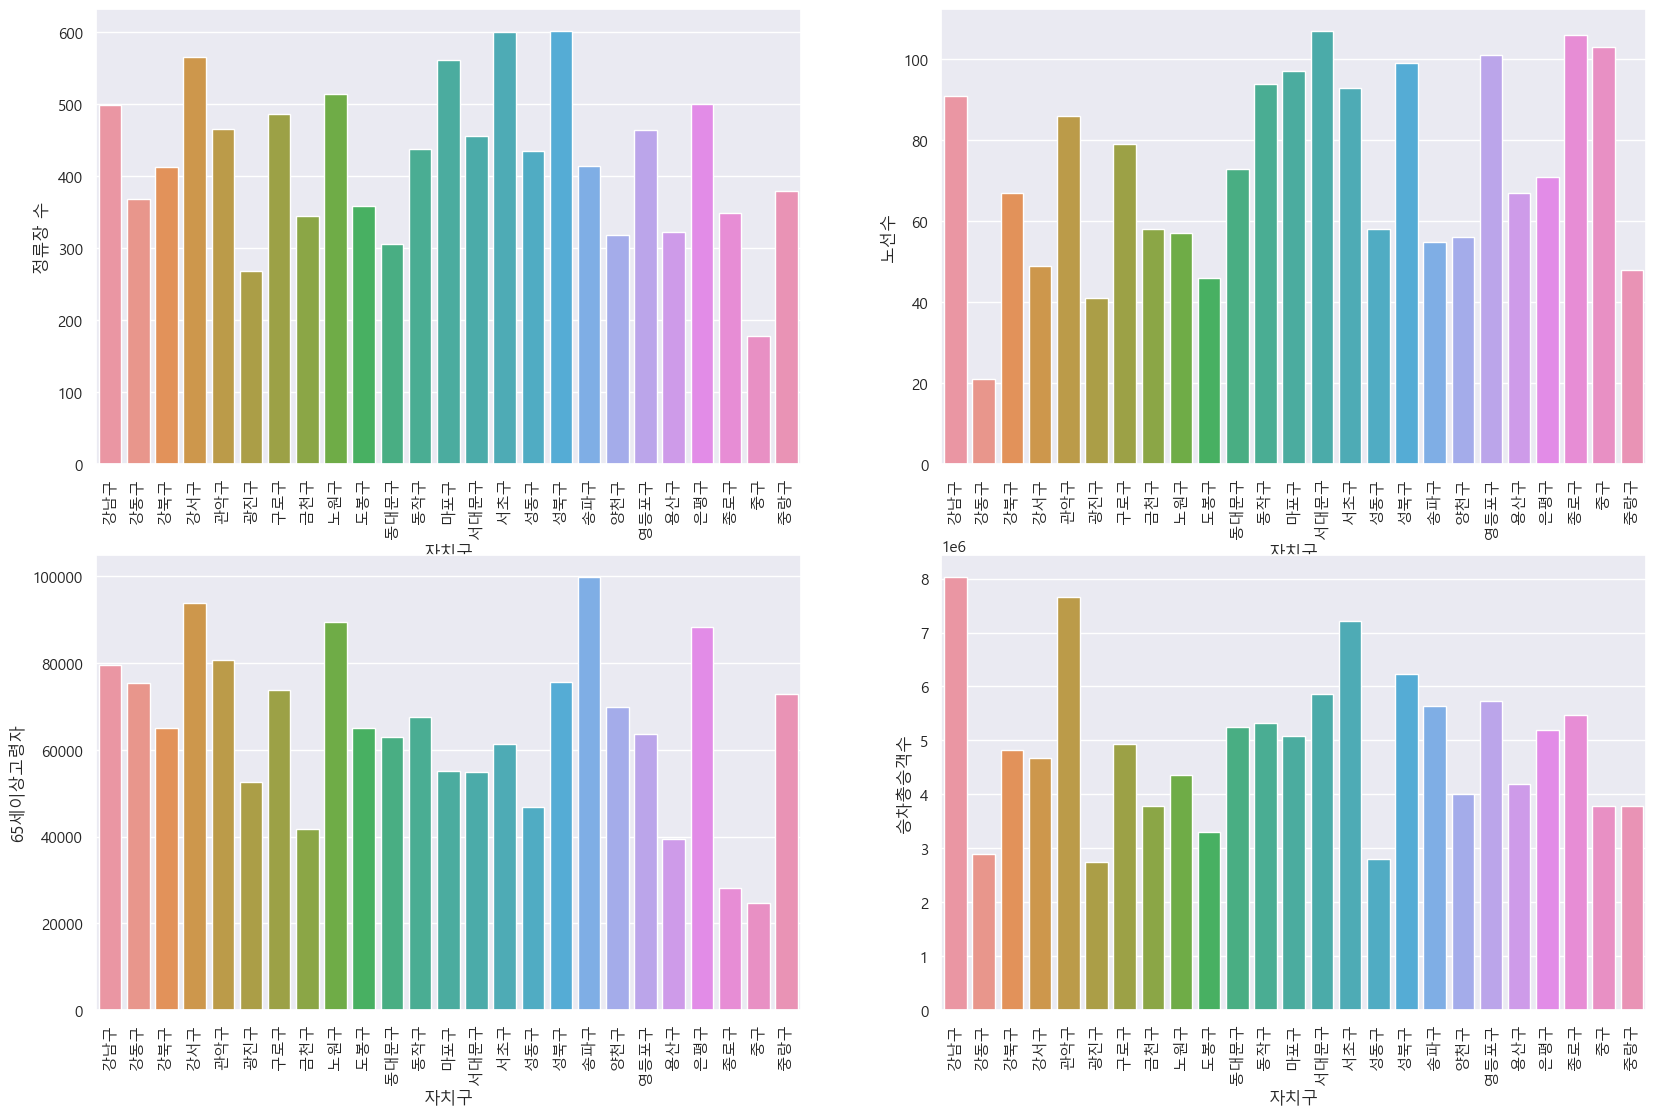

In [95]:
plt.figure(figsize=(20,13))

plt.subplot(2,2,1)
sns.barplot(data=new,x='자치구',y='정류장 수')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.barplot(data=new,x='자치구',y='노선수')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.barplot(data=new,x='자치구',y='65세이상고령자')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.barplot(data=new,x='자치구',y='승차총승객수')
plt.xticks(rotation=90)

plt.savefig('./성동구.png')
plt.show()

상관계수 -0.6874048303585872, P-Value 0.00014680687151646357


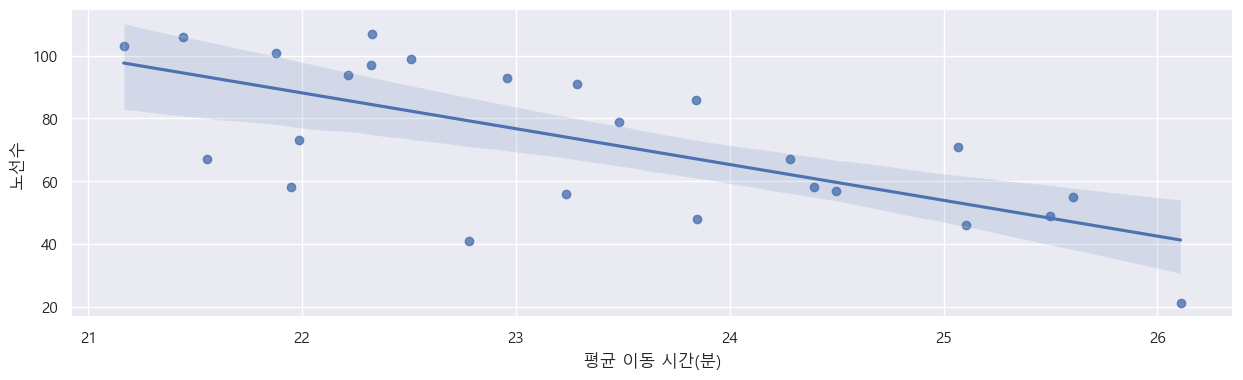

In [133]:
plt.figure(figsize=(15,4))
sns.regplot(data=new,x='평균 이동 시간(분)',y='노선수')
a,b=spst.pearsonr(new['평균 이동 시간(분)'],new['노선수'])
print(f"상관계수 {a}, P-Value {b}")
new['평균이동시간/노선수'] = new['평균 이동 시간(분)'] / new['노선수']

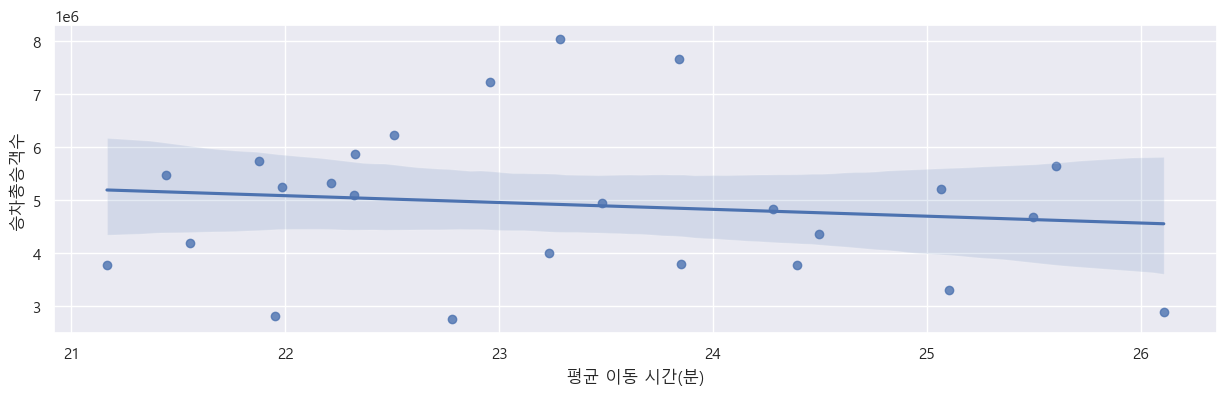

In [134]:
plt.figure(figsize=(15,4))
sns.regplot(data=new,x='평균 이동 시간(분)',y='승차총승객수')
spst.pearsonr(new['평균 이동 시간(분)'],new['승차총승객수'])
new['평균이동시간/승차총승객수'] = new['평균 이동 시간(분)'] / new['승차총승객수'] 

상관계수 0.6654877832095705, P-Value 0.0002830862285771965


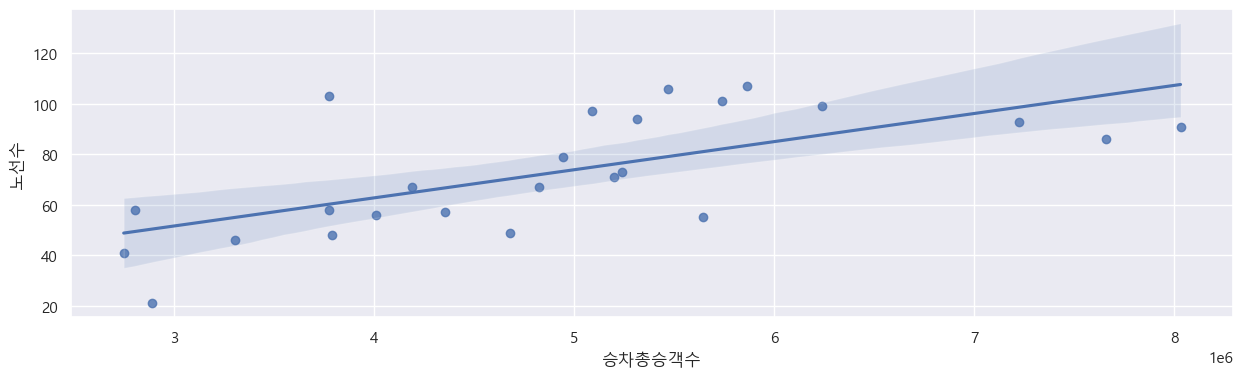

In [135]:
plt.figure(figsize=(15,4))
sns.regplot(data=new,x='승차총승객수',y='노선수')
a,b = spst.pearsonr(new['승차총승객수'],new['노선수'])
print(f"상관계수 {a}, P-Value {b}")
new['승차총승객수/노선수'] = new['승차총승객수'] / new['노선수']

In [136]:
plt.figure(figsize=(15,4))
sns.regplot(data=new,x='평균이동시간',y='노선수')
spst.pearsonr(new['승차총승객수'],new['노선수'])

KeyError: '평균이동시간'

<Figure size 1500x400 with 0 Axes>

상관계수 0.5544251917556622, P-Value 0.004027134889597196


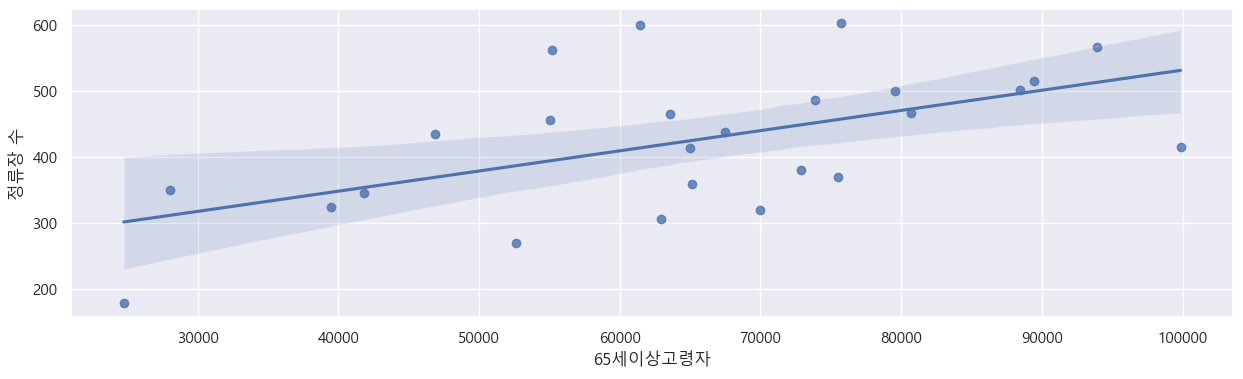

In [137]:
plt.figure(figsize=(15,4))
sns.regplot(data=new,x='65세이상고령자',y='정류장 수')
a,b = spst.pearsonr(x=new['65세이상고령자'],y=new['정류장 수'])
print(f"상관계수 {a}, P-Value {b}")
new['고령자/정류장수'] = new['65세이상고령자'] / new['정류장 수']

상관계수 0.5666813370974586, P-Value 0.003141977397117319


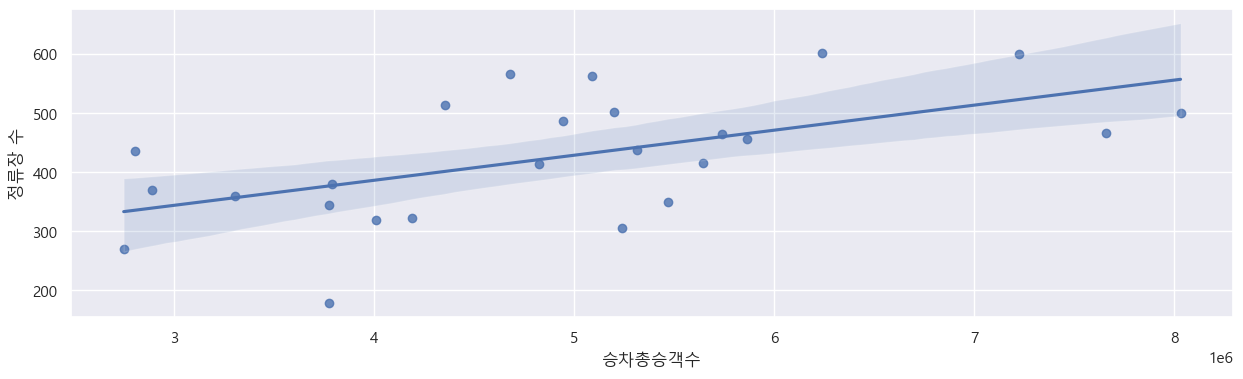

In [138]:
plt.figure(figsize=(15,4))
sns.regplot(data=new,x='승차총승객수',y='정류장 수')
a,b = spst.pearsonr(x=new['승차총승객수'],y=new['정류장 수'])
print(f"상관계수 {a}, P-Value {b}")
new['승차총승객수/정류장수'] = new['승차총승객수'] / new['정류장 수']

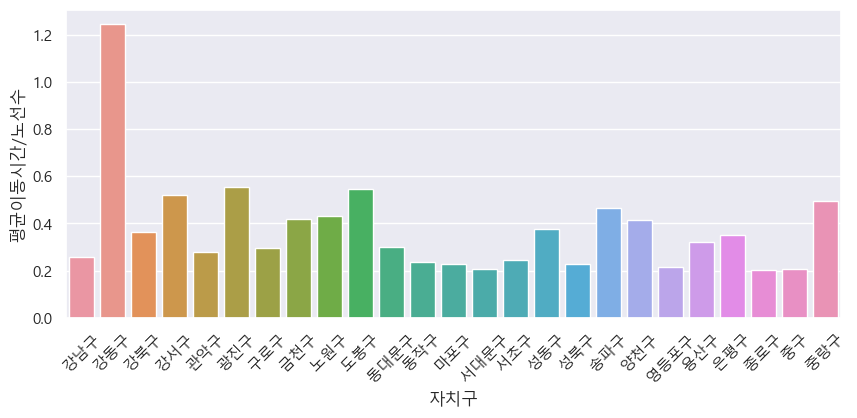

In [150]:
plt.figure(figsize=(10,4))
sns.barplot(data=new,x='자치구',y='평균이동시간/노선수')
plt.xticks(rotation=45)
plt.show()

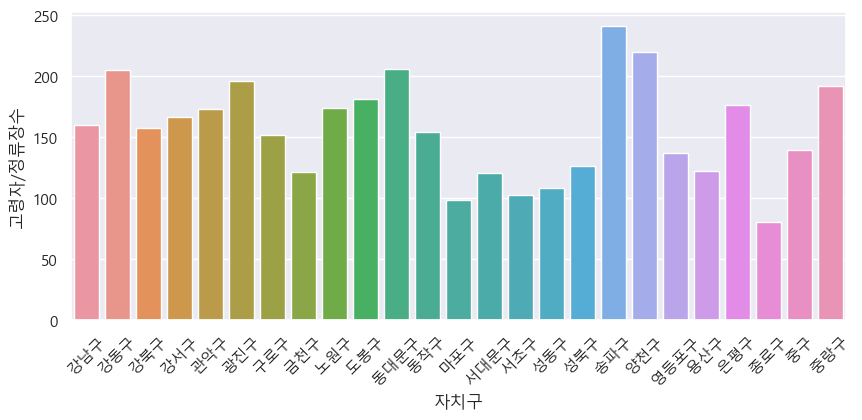

In [151]:
plt.figure(figsize=(10,4))
sns.barplot(data=new,x='자치구',y='고령자/정류장수')
plt.xticks(rotation=45)
plt.show()

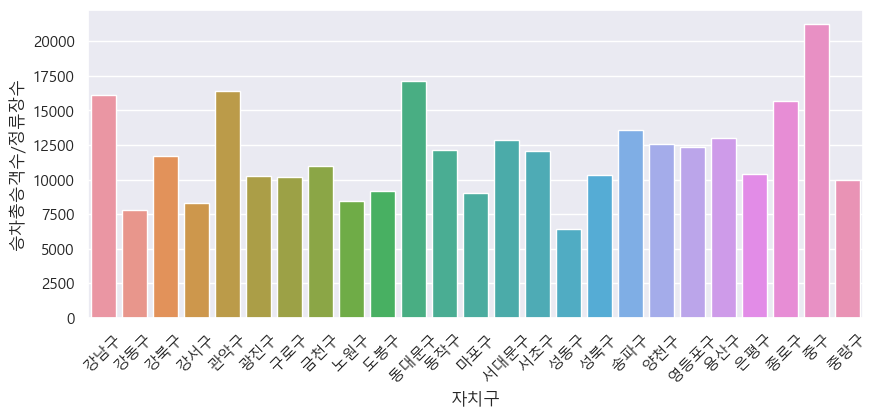

In [152]:
plt.figure(figsize=(10,4))
sns.barplot(data=new,x='자치구',y='승차총승객수/정류장수')
plt.xticks(rotation=45)
plt.show()

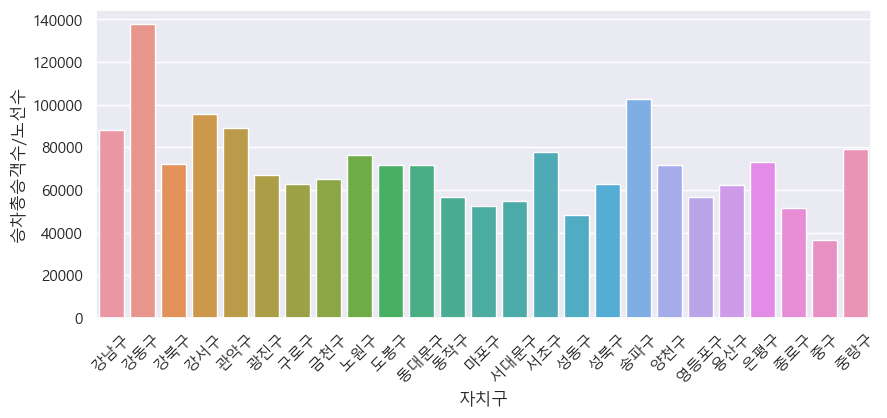

In [153]:
plt.figure(figsize=(10,4))
sns.barplot(data=new,x='자치구',y='승차총승객수/노선수')
plt.xticks(rotation=45)
plt.show()

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [154]:
target = 

SyntaxError: invalid syntax (1535300224.py, line 1)

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

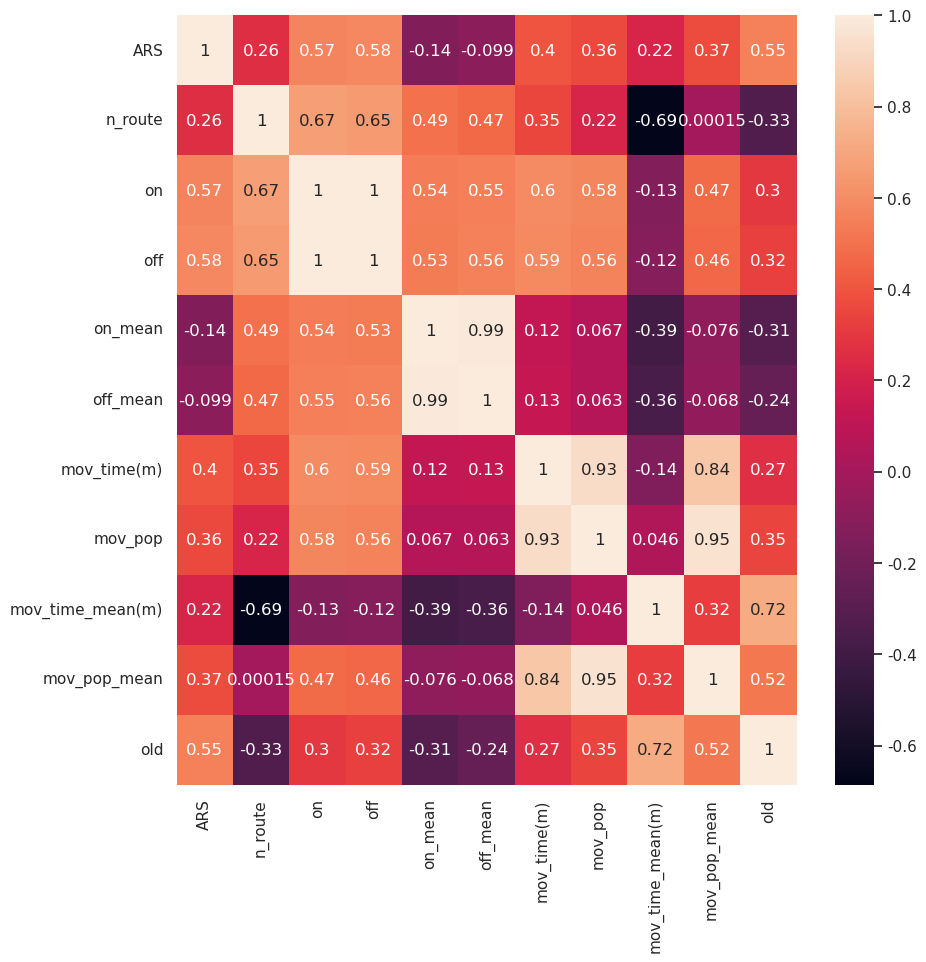

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

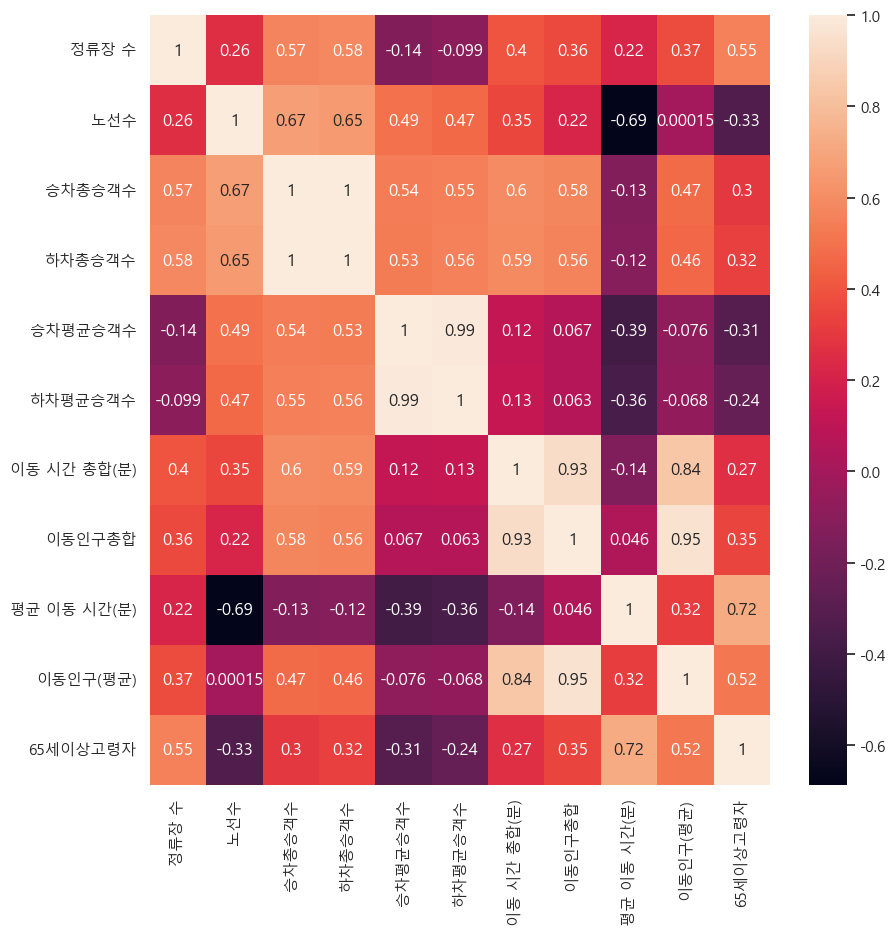

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
plt.figure(figsize=(10,10))
sns.heatmap(new.corr(), annot = True)
plt.savefig('./rr_heatmap.png')
plt.show()

## 4.관계 정리

### 1) 강한 관계의 변수

- 승차승객수=하차승객수
- 노선수:승객수
- 이동시간:승객수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?